# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [3]:
# Loading all the libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Load data

In [4]:
# Load the data files into different DataFrames
calls=pd.read_csv("C:\\Users\\Admin\\Desktop\\MEGALINE\\megaline_calls.csv")
net=pd.read_csv("C:\\Users\\Admin\\Desktop\\MEGALINE\\megaline_internet.csv")
msg=pd.read_csv("C:\\Users\\Admin\\Desktop\\MEGALINE\\megaline_messages.csv")
plans=pd.read_csv("C:\\Users\\Admin\\Desktop\\MEGALINE\\megaline_plans.csv")
users=pd.read_csv("C:\\Users\\Admin\\Desktop\\MEGALINE\\megaline_users.csv")

## Prepare the data

## Plans

In [5]:
# Print the general/summary information about the plans' DataFrame
display(plans.info())
display(plans.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [53]:
# Print a sample of data for plans
display(plans.head())


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


 The data has 8 variables,and 2 rows each for the the type of plan available,either surf or ultimate. There are no missing objects, while the usd_monthly_pay and usb_per_gb have to be converted to float64 data type.

In [7]:
## Fix data
#Converting usd_monthly_pay and usb_per_gb to float64
plans['usd_monthly_pay']=plans['usd_monthly_pay'].astype("float64")
plans['usd_per_gb']=plans['usd_per_gb'].astype("float64")

## Enrich data

## Users

In [54]:
# Print the general/summary information about the users' DataFrame
display(users.info())
display(users.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [55]:
# Print a sample of data for users
display(users.head(10))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


 The data has 8 variables, and 500 rows, representing the users. The reg_date and the churn_date have inaprropriate formats. They will be converted to datetime formats.

### Fix Data

In [60]:
#Checking for duplicates
users_dup=users.duplicated()
display(users_dup)
np.unique(users_dup)#There are no duplicates
users.isnull().sum()#The churn date has 466 entries missing, meaning the users have not exited the plans.

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [10]:
#Converting reg_date and churn_date to datetime format
users['reg_date']=pd.to_datetime(users['reg_date'])
users['churn_date']=pd.to_datetime(users['churn_date'])

## Calls

In [64]:
# Print the general/summary information about the calls' DataFrame
display(calls.info())
display(calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB


None

,user_id,duration,month
count,137735.000000,137735.000000,137735.000000
mean,1247.658046,7.146673,9.320797
std,139.416268,5.953919,2.412550
min,1000.000000,0.000000,1.000000
25%,1128.000000,2.000000,8.000000
50%,1247.000000,6.000000,10.000000
75%,1365.000000,11.000000,11.000000
max,1499.000000,38.000000,12.000000


In [65]:
# Print a sample of data for calls
display(calls.head(10))


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
5,1000_388,1000,2018-12-31,3,12
6,1000_510,1000,2018-12-27,6,12
7,1000_521,1000,2018-12-28,15,12
8,1000_530,1000,2018-12-28,6,12
9,1000_544,1000,2018-12-26,5,12


 The data has 4 variables, and consists of the information on calls made by users, with regard to the date and the duration. The call_date is not in the appropriate format, and the duration has to be rounded up. The call date will be converted to datetime format, and the duration rounded up to the minute.

### Fix data

In [63]:
#Checking duplicates for call data
call_dup=calls.duplicated()
np.unique(call_dup)#There are no duplicates
calls.isnull().sum()#There are no null values


id           0
user_id      0
call_date    0
duration     0
month        0
dtype: int64

In [13]:
calls['call_date']=pd.to_datetime(calls['call_date']) #converting the call_date variable to datetime format
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))  # round up the duration column


### Enrich data

In [14]:
calls['month']=calls['call_date'].dt.month #Creating a column for the month.

## Messages

In [66]:
# Print the general/summary information about the messages' DataFrame
display(msg.info())
display(msg.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


None

,user_id,month
count,76051.000000,76051.000000
mean,1245.972768,9.584016
std,139.843635,2.276392
min,1000.000000,1.000000
25%,1123.000000,8.000000
50%,1251.000000,10.000000
75%,1362.000000,12.000000
max,1497.000000,12.000000


In [67]:
# Print a sample of data for messages
display(msg.head(10))


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


 The data contains 3 variables, with information on the user and the date of sending a message. The message_date is not in an appropriate format, and hence will be converted to a datetime format.

### Fix data

In [73]:
msg_dup=msg.duplicated()#Checking for duplicates
display(np.unique(msg_dup))#There are no duplicates
msg.isnull().sum() There are no null values

array([False])

id              0
user_id         0
message_date    0
month           0
dtype: int64

In [17]:
msg['message_date']=pd.to_datetime(msg['message_date']) #converting the message_date variable to datetime format


### Enrich data

In [18]:
msg['month']=msg['message_date'].dt.month #Creating a column for the month.

## Internet

In [74]:
# Print the general/summary information about the internet DataFrame
display(net.info())
display(net.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


None

,user_id,mb_used,month
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,9.342552
std,142.053913,277.170542,2.400404
min,1000.000000,0.000000,1.000000
25%,1122.000000,136.080000,8.000000
50%,1236.000000,343.980000,10.000000
75%,1367.000000,554.610000,11.000000
max,1499.000000,1693.470000,12.000000


In [75]:
# Print a sample of data for the internet traffic
display(net.head(10))


,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


 The data has 4 variables, describing the date a user used the internet plan and the amount in mbs used. The session date is in the incorrect format, so it will be converted to datetime formaat. 

### Fix data

In [76]:
net_dup=net.duplicated()#Checking for duplicates
display(np.unique(net_dup))#There are no duplicates
net.isnull().sum()#There are no missing values

array([False])

id              0
user_id         0
session_date    0
mb_used         0
month           0
dtype: int64

In [21]:
net['session_date']=pd.to_datetime(net['session_date']) #converting the session_date variable to datetime format

### Enrich data

In [22]:
net['month']=net['session_date'].dt.month #Creating a column for the month.

## Study plan conditions

In [78]:
# Print out the plan conditions and make sure they are clear for you
print(""" Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Surf
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

Ultimate
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7""")


 Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Surf
Monthly charge: $20
500 monthly minutes, 50 texts, and 15 GB of data
After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: $10

Ultimate
Monthly charge: $70
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: $7


## Aggregate data per user


In [79]:
# Calculate the number of calls made by each user per month. Save the result.
calls_agg = calls.groupby(['user_id', 'month']).agg({'duration': 'count'}).reset_index()


In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_agg = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()



In [83]:
calls_agg = calls.pivot_table(index = ['user_id', 'month'],
                                  values = 'duration', 
                                  aggfunc = ['sum','count'])

calls_agg.columns = ['total_minutes', 'sum_calls']

#calls_agg = calls_per_user_period.reset_index()

calls_agg

total_minutes  sum_calls
user_id month                          
1000    12               124         16
1001    8                182         27
        9                315         49
        10               393         65
        11               426         64
...                      ...        ...
1498    12               339         39
1499    9                346         41
        10               385         53
        11               308         45
        12               496         65

[2258 rows x 2 columns]

In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
msg_agg = msg.groupby(['user_id', 'month']).agg({'message_date': 'count'}).reset_index()
msg_agg.rename(columns={'message_date': 'num_messages'}, inplace=True)


In [27]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
net_agg = net.groupby(['user_id', 'month'], as_index=False)['mb_used'].sum()
net_agg['gb_used'] = np.ceil(net_agg['mb_used'] / 1024)


In [89]:
# [Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.] and  Merging the data for calls, minutes, messages, internet based on user_id and month

df1 = pd.merge(net_agg, calls_agg, on=['user_id', 'month'], how='outer')
df2 = pd.merge(df1, msg_agg, on=['user_id', 'month'], how='outer')
dat = df2.rename(columns={'gb_used': 'internet_traffic', 'duration': 'calls_duration', 'num_messages': 'messages_sent'})
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dat['month'] = dat['month'].map(month_map)
display(dat.head(10))
display(dat.shape)#Checking the dimensions of the data


,user_id,month,mb_used,internet_traffic,total_minutes,sum_calls,messages_sent
0,1000,Dec,1901.47,2.0,124.0,16.0,11.0
1,1001,Aug,6919.15,7.0,182.0,27.0,30.0
2,1001,Sep,13314.82,14.0,315.0,49.0,44.0
3,1001,Oct,22330.49,22.0,393.0,65.0,53.0
4,1001,Nov,18504.30,19.0,426.0,64.0,36.0
5,1001,Dec,19369.18,19.0,412.0,56.0,44.0
6,1002,Oct,6552.01,7.0,59.0,11.0,15.0
7,1002,Nov,19345.08,19.0,386.0,55.0,32.0
8,1002,Dec,14396.24,15.0,384.0,47.0,41.0
9,1003,Dec,27044.14,27.0,1104.0,149.0,50.0


(2293, 7)

In [91]:
# Adding the plan information
user_ft=users[['user_id','plan','city']]
merged = pd.merge(dat, user_ft, on='user_id')
display(merged.head(10))
display(merged.shape)

,user_id,month,mb_used,internet_traffic,total_minutes,sum_calls,messages_sent,plan,city
0,1000,Dec,1901.47,2.0,124.0,16.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,Aug,6919.15,7.0,182.0,27.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,Sep,13314.82,14.0,315.0,49.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,Oct,22330.49,22.0,393.0,65.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,Nov,18504.30,19.0,426.0,64.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
5,1001,Dec,19369.18,19.0,412.0,56.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
6,1002,Oct,6552.01,7.0,59.0,11.0,15.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
7,1002,Nov,19345.08,19.0,386.0,55.0,32.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
8,1002,Dec,14396.24,15.0,384.0,47.0,41.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
9,1003,Dec,27044.14,27.0,1104.0,149.0,50.0,surf,"Tulsa, OK MSA"


(2293, 9)

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [99]:
# Calculate the monthly revenue for each user

#Creating a function to calculate the monthly revenue aaerned from each user.
def calculate_revenue(row):
    plan = row['plan']
    minutes = row['total_minutes']
    texts = row['messages_sent']
    data = row['internet_traffic']

    if plan == 'surf':
        if minutes <= 500 and texts <= 50 and data <= 15:
            revenue = 20
        else:
            minutes_excess = max(minutes - 500, 0)
            texts_excess = max(texts - 50, 0)
            data_excess = max(data - 15, 0)
            revenue = 20 + minutes_excess * 0.03 + texts_excess * 0.03 + data_excess * 10

    elif plan == 'ultimate':
        if minutes <= 3000 and texts <= 1000 and data <= 30:
            revenue = 70
        else:
            minutes_excess = max(minutes - 3000, 0)
            texts_excess = max(texts - 1000, 0)
            data_excess = max(data - 30, 0)
            revenue = 70 + minutes_excess * 0.01 + texts_excess * 0.01 + data_excess * 7

    else:
        raise ValueError("Invalid plan type.")

    return revenue


In [100]:
#Applying the function to the data
merged.fillna(0, inplace=True)
merged['revenue'] = merged.apply(calculate_revenue, axis=1)
merged.head(10)


,user_id,month,mb_used,internet_traffic,total_minutes,sum_calls,messages_sent,plan,city,revenue
0,1000,Dec,1901.47,2.0,124.0,16.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,Aug,6919.15,7.0,182.0,27.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,Sep,13314.82,14.0,315.0,49.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,Oct,22330.49,22.0,393.0,65.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.09
4,1001,Nov,18504.30,19.0,426.0,64.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00
5,1001,Dec,19369.18,19.0,412.0,56.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00
6,1002,Oct,6552.01,7.0,59.0,11.0,15.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.00
7,1002,Nov,19345.08,19.0,386.0,55.0,32.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",60.00
8,1002,Dec,14396.24,15.0,384.0,47.0,41.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",20.00
9,1003,Dec,27044.14,27.0,1104.0,149.0,50.0,surf,"Tulsa, OK MSA",158.12


## **Summary of the section.**

Thus far, I have loaded the data, cleaned it and done some feature engineering to it. Some of the steps undertaken include converting variables to their relevant data types and extracting new features from the existing data. I have also checked the data for any instances of duplicate values and null values, going a step further to explain why some occured when they did. I have also computed summary statistics for some of the variables. I have merged all the features necessary for this analysis from all the datasets provided, and joined them to form a single dataframe. These variables include user_id, internet_traffic, total_minutes,messages_sent,plan, City and revenue. The revenue collected from each user was obtained using a custom function I made. 

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

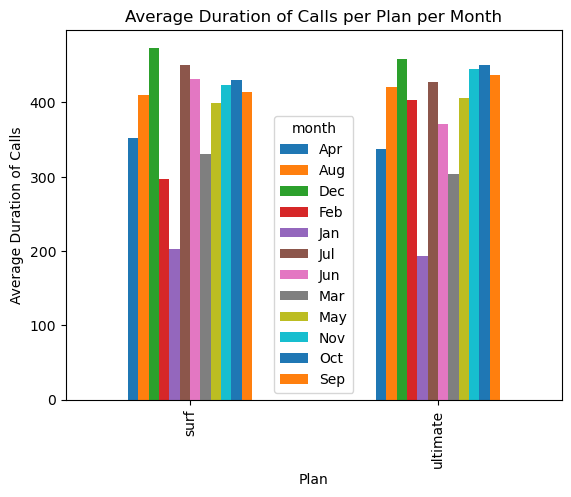

In [34]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
grouped = merged.groupby(['plan', 'month'])['calls_duration'].mean() #Grouping the data by plan and month
grouped = grouped.reset_index().pivot(index='plan', columns='month', values='calls_duration')
grouped.plot.bar()#plotting the bar chart
plt.xlabel('Plan')
plt.ylabel('Average Duration of Calls')
plt.title('Average Duration of Calls per Plan per Month')
plt.show()

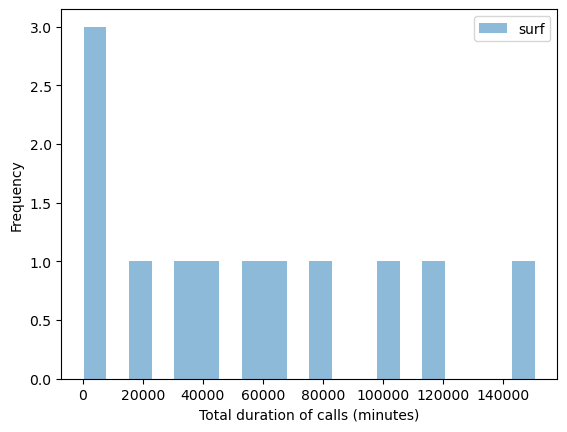

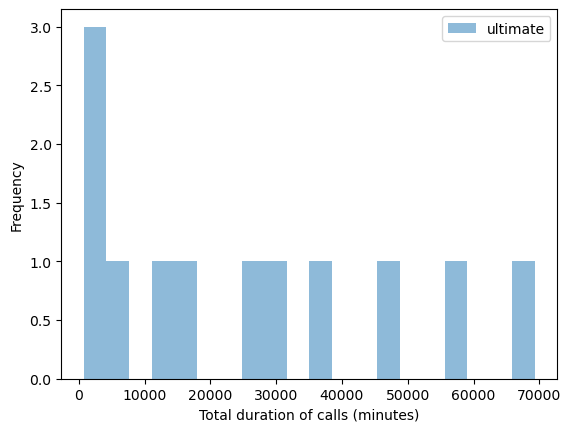

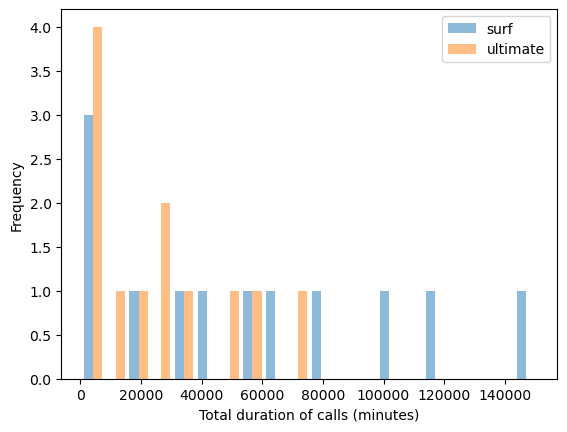

In [35]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
duration_by_plan_month = merged.groupby(['plan', 'month'])['calls_duration'].sum() #Grouping the data by plan and month, and calculating the total duration

# Separate the data for each plan into its own series
surf_duration = duration_by_plan_month['surf']
ultimate_duration = duration_by_plan_month['ultimate']

# Histogram for the surf plan
plt.hist([surf_duration], bins=20, alpha=0.5, label=['surf'])
plt.legend(loc='upper right')
plt.xlabel('Total duration of calls (minutes)')
plt.ylabel('Frequency')
plt.show()

#Histogram for the ultimate plan
plt.hist([ultimate_duration], bins=20, alpha=0.5, label=[ 'ultimate'])
plt.legend(loc='upper right')
plt.xlabel('Total duration of calls (minutes)')
plt.ylabel('Frequency')
plt.show()

#Comparative histogram for both plans
plt.hist([surf_duration, ultimate_duration], bins=20, alpha=0.5, label=['surf', 'ultimate'])
plt.legend(loc='upper right')
plt.xlabel('Total duration of calls (minutes)')
plt.ylabel('Frequency')
plt.show()

Next, we calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.


In [36]:
# Calculate the mean and the variance of the monthly call duration
surf_call_duration_mean = merged.loc[merged['plan'] == 'surf', 'calls_duration'].mean() #Calculating the mean call duration for the surf plan
surf_call_duration_var = merged.loc[merged['plan'] == 'surf', 'calls_duration'].var() #Calculating the variance of the call duration for the surf plan
surf_call_duration_std = merged.loc[merged['plan'] == 'surf', 'calls_duration'].std() #Calculating the variance of the call duration for the surf plan


ultimate_call_duration_mean = merged.loc[merged['plan'] == 'ultimate', 'calls_duration'].mean() #Calculating the mean call duration of the ultimate plan
ultimate_call_duration_var = merged.loc[merged['plan'] == 'ultimate', 'calls_duration'].var() #Calculating the variance of the call duration for the ultimate plan
ultimate_call_duration_std = merged.loc[merged['plan'] == 'ultimate', 'calls_duration'].std() #Calculate the standard deviation

print("Surf plan call duration mean:", surf_call_duration_mean)
print("Surf plan call duration variance:", surf_call_duration_var)
print("Surf plan call duration standard deviation:", surf_call_duration_std)


print("Ultimate plan call duration mean:", ultimate_call_duration_mean)
print("Ultimate plan call duration variance:", ultimate_call_duration_var)
print("Ultimate plan call duration standard deviation:", ultimate_call_duration_std)


Surf plan call duration mean: 428.7495232040687
Surf plan call duration variance: 54968.27946065032
Surf plan call duration standard deviation: 234.4531498202793
Ultimate plan call duration mean: 430.45
Ultimate plan call duration variance: 57844.4648122392
Ultimate plan call duration standard deviation: 240.50876244378125


<AxesSubplot:xlabel='plan', ylabel='calls_duration'>

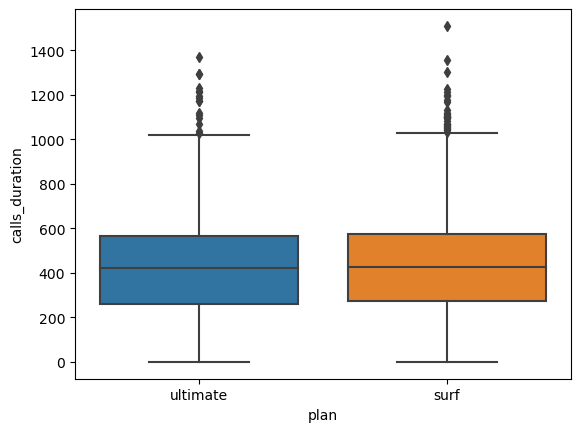

In [37]:
# Plot a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(x='plan', y='calls_duration', data=merged)




 The mean of the call duration for the surf plan is 428.7495232040687, while that of the ultimate plan is 430.45. There does not seem to be a notable difference in behaviour and distribution of the two plans, as evidenced by the boxplots. The total duration of calls is skewed to the right, judging by the histograms of both plans. 

### Messages

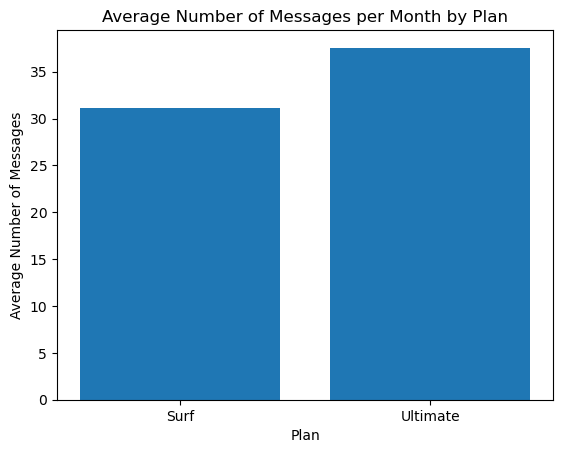

The mean number of messages sent by users on the surf plan is: 31.15956770502225
The mean number of messages sent by users on the ultimate plan is: 37.55138888888889


In [38]:
# Compare the number of messages users of each plan tend to send each month
import matplotlib.pyplot as plt

surf_messages = merged[merged['plan']=='surf']['messages_sent']
ultimate_messages = merged[merged['plan']=='ultimate']['messages_sent']

surf_mean_messages = surf_messages.mean()
ultimate_mean_messages = ultimate_messages.mean()

plt.bar(['Surf', 'Ultimate'], [surf_mean_messages, ultimate_mean_messages])
plt.title('Average Number of Messages per Month by Plan')
plt.xlabel('Plan')
plt.ylabel('Average Number of Messages')
plt.show()
print("The mean number of messages sent by users on the surf plan is:", surf_mean_messages)
print("The mean number of messages sent by users on the ultimate plan is:", ultimate_mean_messages)


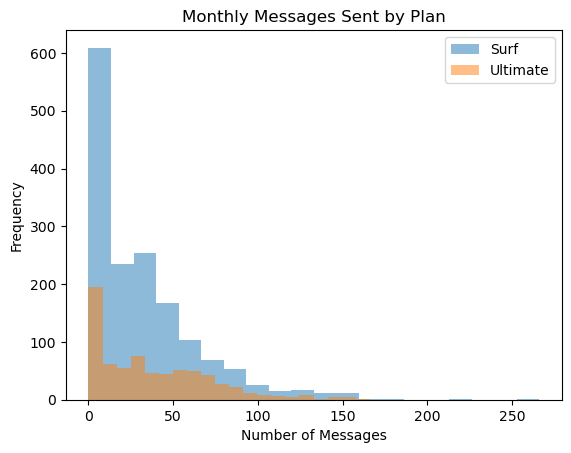

In [39]:
# create two separate dataframes for each plan
surf_df = merged.loc[merged['plan'] == 'surf']
ultimate_df = merged.loc[merged['plan'] == 'ultimate']

# plot histograms for number of messages sent per month for each plan
plt.hist(surf_df['messages_sent'], alpha=0.5, bins=20, label='Surf')
plt.hist(ultimate_df['messages_sent'], alpha=0.5, bins=20, label='Ultimate')

# add labels and title to the plot
plt.xlabel('Number of Messages')
plt.ylabel('Frequency')
plt.title('Monthly Messages Sent by Plan')

# add a legend to the plot
plt.legend()

# display the plot
plt.show()


<AxesSubplot:xlabel='plan', ylabel='messages_sent'>

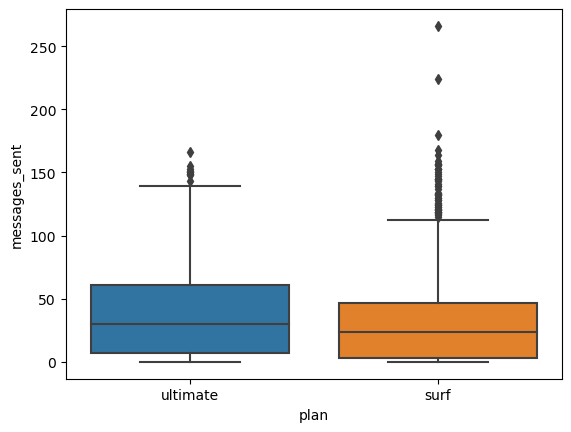

In [40]:
# Plot a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(x='plan', y='messages_sent', data=merged)

In [41]:
# Calculate the mean and the variance of the monthly messages sent
surf_messages_mean = merged.loc[merged['plan'] == 'surf', 'messages_sent'].mean() #Calculating the mean messages sent for the surf plan
surf_messages_var = merged.loc[merged['plan'] == 'surf', 'messages_sent'].var() #Calculating the variance of the messages sent for the surf plan
surf_messages_std = merged.loc[merged['plan'] == 'surf', 'messages_sent'].std() #Calculating the variance of the messages sent for the surf plan


ultimate_messages_mean = merged.loc[merged['plan'] == 'ultimate', 'messages_sent'].mean() #Calculating the mean messages sent of the ultimate plan
ultimate_messages_var = merged.loc[merged['plan'] == 'ultimate', 'messages_sent'].var() #Calculating the variance of the messages sent for the ultimate plan
ultimate_messages_std = merged.loc[merged['plan'] == 'ultimate', 'messages_sent'].std() #Calculate the standard deviation

print("Surf plan messages sent mean:", surf_messages_mean)
print("Surf plan messages sent variance:", surf_messages_var)
print("Surf planmessages sent standard deviation:", surf_messages_std)


print("Ultimate plan messages sent mean:", ultimate_messages_mean)
print("Ultimate plan messages sent variance:", ultimate_messages_var)
print("Ultimate plan messages sent standard deviation:", ultimate_messages_std)

Surf plan messages sent mean: 31.15956770502225
Surf plan messages sent variance: 1126.7245219504084
Surf planmessages sent standard deviation: 33.56671747356909
Ultimate plan messages sent mean: 37.55138888888889
Ultimate plan messages sent variance: 1208.756743548134
Ultimate plan messages sent standard deviation: 34.767179114045675


On average, users on the ultimate plan send more messages (38) than users on the surf plan(32). There is also evidently a difference in the distribution of messages between the two plans, as shown in the boxplot. From the histogram, we can deduce that the number of messages sent, for both plans, is skewed to the right.

### Internet

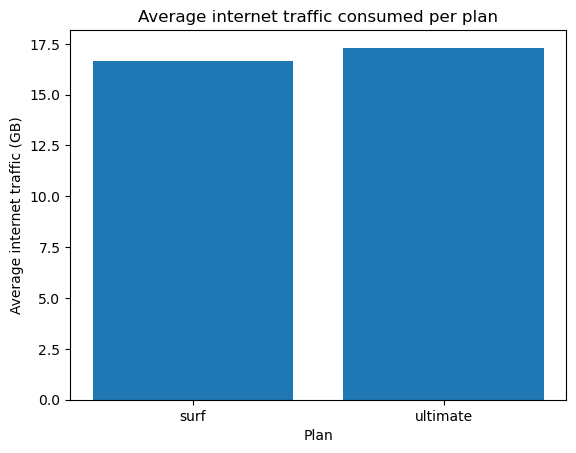

Average internet usage per month for Surf plan users: 16.670692943420217
Average internet usage per month for Ultimate plan users: 17.306944444444444


In [42]:
#Compare the amount of internet traffic consumed by users per plan

#Genrating a barplot to compare the average internet traffic for the two plans
avg_internet_traffic = merged.groupby('plan')['internet_traffic'].mean()
plt.bar(avg_internet_traffic.index, avg_internet_traffic.values)
plt.xlabel('Plan')
plt.ylabel('Average internet traffic (GB)')
plt.title('Average internet traffic consumed per plan')
plt.show()

#Calculating and displaying the averages.
surf_avg_internet = merged[merged['plan'] == 'surf']['internet_traffic'].mean()
ultimate_avg_internet = merged[merged['plan'] == 'ultimate']['internet_traffic'].mean()
print('Average internet usage per month for Surf plan users:', surf_avg_internet)
print('Average internet usage per month for Ultimate plan users:', ultimate_avg_internet)


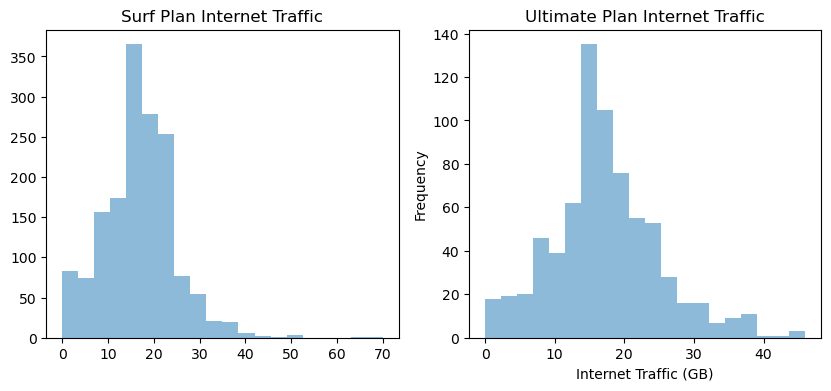

In [43]:
# create two data frames for surf and ultimate plan internet traffic
surf_traffic = merged.loc[merged['plan'] == 'surf', 'internet_traffic']
ultimate_traffic = merged.loc[merged['plan'] == 'ultimate', 'internet_traffic']

# plotting the histograms
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(surf_traffic, bins=20, alpha=0.5)
axs[1].hist(ultimate_traffic, bins=20, alpha=0.5)
axs[0].set_title('Surf Plan Internet Traffic')
axs[1].set_title('Ultimate Plan Internet Traffic')
plt.xlabel('Internet Traffic (GB)')
plt.ylabel('Frequency')
plt.show()


<AxesSubplot:xlabel='plan', ylabel='internet_traffic'>

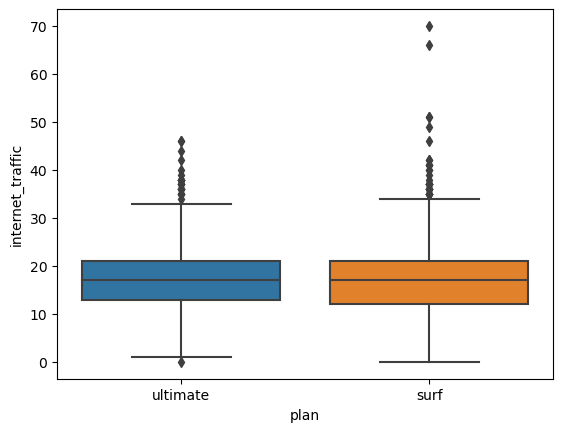

In [44]:
#boxplot to visualize the distributions of internet traffic on the two plans.
sns.boxplot(x="plan", y="internet_traffic", data=merged)

In [45]:
# Calculate the mean and the variance of the monthly internet traffic
surf_net_mean = merged.loc[merged['plan'] == 'surf', 'internet_traffic'].mean() #Calculating the mean internet traffic for the surf plan
surf_net_var = merged.loc[merged['plan'] == 'surf', 'internet_traffic'].var() #Calculating the variance of the internet traffic for the surf plan
surf_net_std = merged.loc[merged['plan'] == 'surf', 'internet_traffic'].std() #Calculating the standard deviation of the internet traffic for the surf plan


ultimate_net_mean = merged.loc[merged['plan'] == 'ultimate', 'internet_traffic'].mean() #Calculating the mean internet traffic of the ultimate plan
ultimate_net_var = merged.loc[merged['plan'] == 'ultimate', 'internet_traffic'].var() #Calculating the variance of the internet traffic for the ultimate plan
ultimate_net_std = merged.loc[merged['plan'] == 'ultimate', 'internet_traffic'].std() #Calculate the standard deviation

print("Surf plan internet traffic mean:", surf_net_mean)
print("Surf plan internet traffic variance:", surf_net_var)
print("Surf plan internet traffic standard deviation:", surf_net_std)


print("Ultimate plan internet traffic mean:", ultimate_net_mean)
print("Ultimate plan internet traffic variance:", ultimate_net_var)
print("Ultimate plan internet traffic standard deviation:", ultimate_net_std)

Surf plan internet traffic mean: 16.670692943420217
Surf plan internet traffic variance: 61.58359983759016
Surf plan internet traffic standard deviation: 7.847521891501174
Ultimate plan internet traffic mean: 17.306944444444444
Ultimate plan internet traffic variance: 58.830549760469665
Ultimate plan internet traffic standard deviation: 7.670107545560862


 There is not a lot of difference in the amount of data consumed by users of the two plans. Surf users average 16.670692943420217 GB, while ultimate users consume an average of 17.306944444444444 GB. From the histogram, the internet traffic for the surf plan is more skewed to the right than that of the ultimate plan, which is more symmetrical but not perfectly symmetrical.

## Revenue

In [46]:
# Calculate statistics for surf plan
surf_revenue = merged.loc[merged['plan']=='surf', 'revenue']
surf_mean = np.mean(surf_revenue) #mean revenue for the surf plan
surf_median = np.median(surf_revenue) #median revenue for the surf plan
surf_min = np.min(surf_revenue) #Minimum revenue for the surf plan
surf_max = np.max(surf_revenue) #Maximum revenue for the surf plan
surf_var = np.var(surf_revenue) #Variance of the surf plan revenue

# Calculate statistics for ultimate plan
ultimate_revenue = merged.loc[merged['plan']=='ultimate', 'revenue']
ultimate_mean = np.mean(ultimate_revenue) #MMean revenue for the ultimate plan
ultimate_median = np.median(ultimate_revenue) #Median revenue for the ultimate plan
ultimate_min = np.min(ultimate_revenue) #Miniimum revenue for the ultimate plan
ultimate_max = np.max(ultimate_revenue) #Maximum revenue for the ultimate plan
ultimate_var = np.var(ultimate_revenue) #Varaince in the ultimate plan revenue

# Printing the statistics
print("Surf plan revenue:")
print(f"Mean: ${surf_mean:.2f}")
print(f"Median: ${surf_median:.2f}")
print(f"Minimum: ${surf_min:.2f}")
print(f"Maximum: ${surf_max:.2f}")
print(f"Variance: ${surf_var:.2f}\n")

print("Ultimate plan revenue:")
print(f"Mean: ${ultimate_mean:.2f}")
print(f"Median: ${ultimate_median:.2f}")
print(f"Minimum: ${ultimate_min:.2f}")
print(f"Maximum: ${ultimate_max:.2f}")
print(f"Variance: ${ultimate_var:.2f}")


Surf plan revenue:
Mean: $60.71
Median: $40.36
Minimum: $20.00
Maximum: $590.37
Variance: $3065.88

Ultimate plan revenue:
Mean: $72.31
Median: $70.00
Minimum: $70.00
Maximum: $182.00
Variance: $129.67


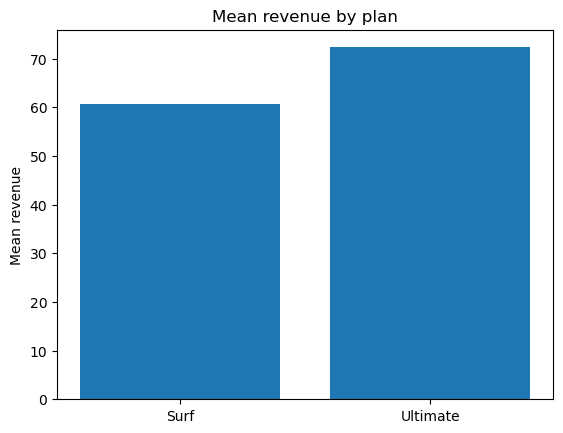

In [47]:
#Barplot comparing the mean revenues by plan
fig, ax = plt.subplots()
ax.bar(['Surf', 'Ultimate'], [surf_mean, ultimate_mean])
ax.set_ylabel('Mean revenue')
ax.set_title('Mean revenue by plan')
plt.show()

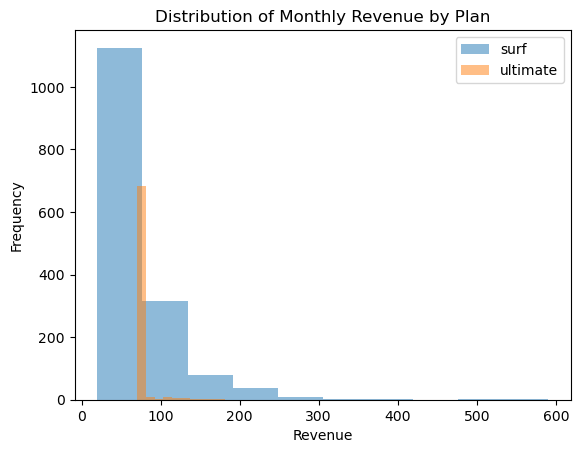

In [48]:
#Histogram to compare the distributiion of revenues for the two plans
surf_revenue = merged.loc[merged['plan'] == 'surf', 'revenue']
ultimate_revenue = merged.loc[merged['plan'] == 'ultimate', 'revenue']

plt.hist(surf_revenue, alpha=0.5, label='surf')
plt.hist(ultimate_revenue, alpha=0.5, label='ultimate')

# add labels and title
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Revenue by Plan')

# add legend
plt.legend()

# show plot
plt.show()

<AxesSubplot:xlabel='plan', ylabel='revenue'>

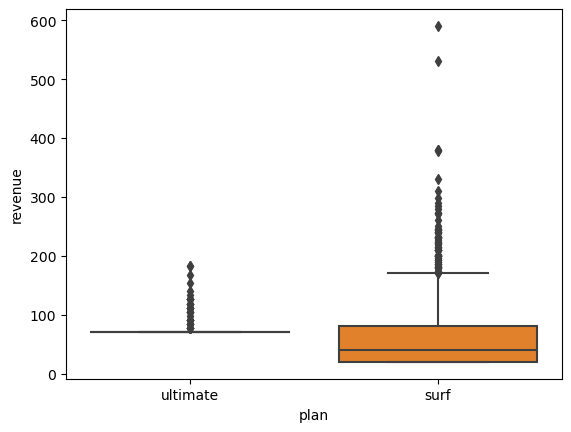

In [49]:
#boxplot to visualize the distributions of revenue on the two plans.
sns.boxplot(x="plan", y="revenue", data=merged)

In [50]:
total_revenue = merged.groupby('plan')['revenue'].sum() #Computing the total revenue earned per plan

print(total_revenue)

plan
surf        95491.18
ultimate    52066.00
Name: revenue, dtype: float64


 The total revenue collected from the surf plan users (95491.18) is higher than that collected from ultimate plan users (52066). The mean revenue per surf plan user(60.71) is however lower than the mean revenue collected per ultimate plan user(72.31)

## **[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]**

## **Test the hypotheses**
- H0: The means of the revenues generated from the surf ansd ultimate plans are equal.
- H1: The means of the revenues generated from the surf and ultimate plans differ.

   alpha=0.05

In [51]:
#two-sample t-test
#Splittting the data into surf and ultimate plan revenues
surf_revenue = merged[merged['plan'] == 'surf']['revenue']
ultimate_revenue = merged[merged['plan'] == 'ultimate']['revenue']
#Computing the t-test
t_stat, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)
print("p-value:", p_value)

p-value: 3.1703905481135734e-15


The p-value obtained, 3.1703905481135734e-15, is very small and significantly less than 0.05, our level of significance. We therefore reject the null hypothesis. The means of the revenues generated from the surf and ultimate plans differ.



## **[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]**

### **[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]**
- H0:The mean revenue of users in the NY-NJ area is equal to the mean revenue of users from other regions.
- H1:The mean revenue of users in the NY-NJ area is different from the mean revenue of users from other regions.

   alpha=0.05

In [52]:
# Test the hypotheses
# Splitting the data into "NY-NJ", and "other" regions.
ny_nj_revenue = merged.loc[merged["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA", "revenue"]
other_revenue = merged.loc[merged["city"] != "NY-NJ", "revenue"]
#Computing the 2-sample t-test
t_statistic, p_value = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)
print("p-value:", p_value)

p-value: 0.0705417047755026


The p-value obtained, 0.0705417047755026, is greater than the level of significance, 0.0705417047755026. We fail to reject the null hypothesis. The mean revenue of users in the NY-NJ area is equal to the mean revenue of users from other regions.



## General conclusion

1. Users of the ultimate plan have a higher mean call duration than users of the surf plan.
2. Users of the ultimate plan, on average, send more messages tha users of the surf plan.
3. On average, ultimate plan users consume more internet data than surf plan users.
4. The average revenue per user generated from ultimate users is higher than that generated from surf users.
5. The total revenue generated from surf plan users is higher than that generated from ultimate plan users.
6. Statistically speaking, the difference in the means of the revenues generated from the surf and ultimate plans differ significantly.
7. The  mean revenue generated from users in the NY-NJ area does not differ significantly from the mean revenue generated from users in other regions.

An assumption I made was that the dqta provided was normally distributed, and that the data points are independent of each other. This was necessary so as to be able to apply the t-test when testing for significant differences.   I also assumed that the value of money remained the same throughout the period that the data spanned, enabling comparison across various time points.
